# DM-25910: Monthly July 2020 ap_pipe HiTS2015 reprocessing

### The HiTS dataset and AP Pipeline
I ran ap_pipe.py via slurm on the HiTS2015 dataset. I used coadds built in Jan 2020 from HiTS2014 as templates. The dataset consists of 3 fields (pointings), each visited 28 times, all in _g_ band. Two of the fields have a small spatial overlap.

Running ap_pipe saves information about DIA Objects and DIA Sources in an Alert Production Database (APDB), which I use for the majority of this notebook. "Filtered" or "Good" means DIA Sources with one or more of the "bad," "saturated center," or "suspect" pixel flags have been excluded.

I ran this July 2020 rerun using the weekly build `w_2020_27`.

### Literally no change from June 2020
Technically there was 1 more "good" DIA Object in July. Everything else was identical. Consistency! Huzzah!

In [1]:
%matplotlib notebook

import sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import pandas as pd

from astropy.coordinates import SkyCoord
import astropy.units as u

import lsst.daf.persistence as dafPersist

In [2]:
sys.path.append('/project/mrawls/ap_pipe-notebooks/')
import diaObjectAnalysis as doa
import apdbPlots as pla

In [ ]:
# Only if you change anything in the code imported above
importlib.reload(doa)
importlib.reload(pla)

In [3]:
repo = '/project/mrawls/hits2015/rerun/cw_2020_07'

In [4]:
objTable, srcTable, goodObj, goodSrc = pla.loadTables(repo)

In [5]:
hitsPlot = pla.plotHitsSourcesOnSky(goodObj, title='Good DIA Objects')

<IPython.core.display.Javascript object>

In [6]:
hist = doa.plotDiaObjectHistogram(objTable, goodObj)

<IPython.core.display.Javascript object>

In [7]:
pla.plotDiaSourceDensityInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


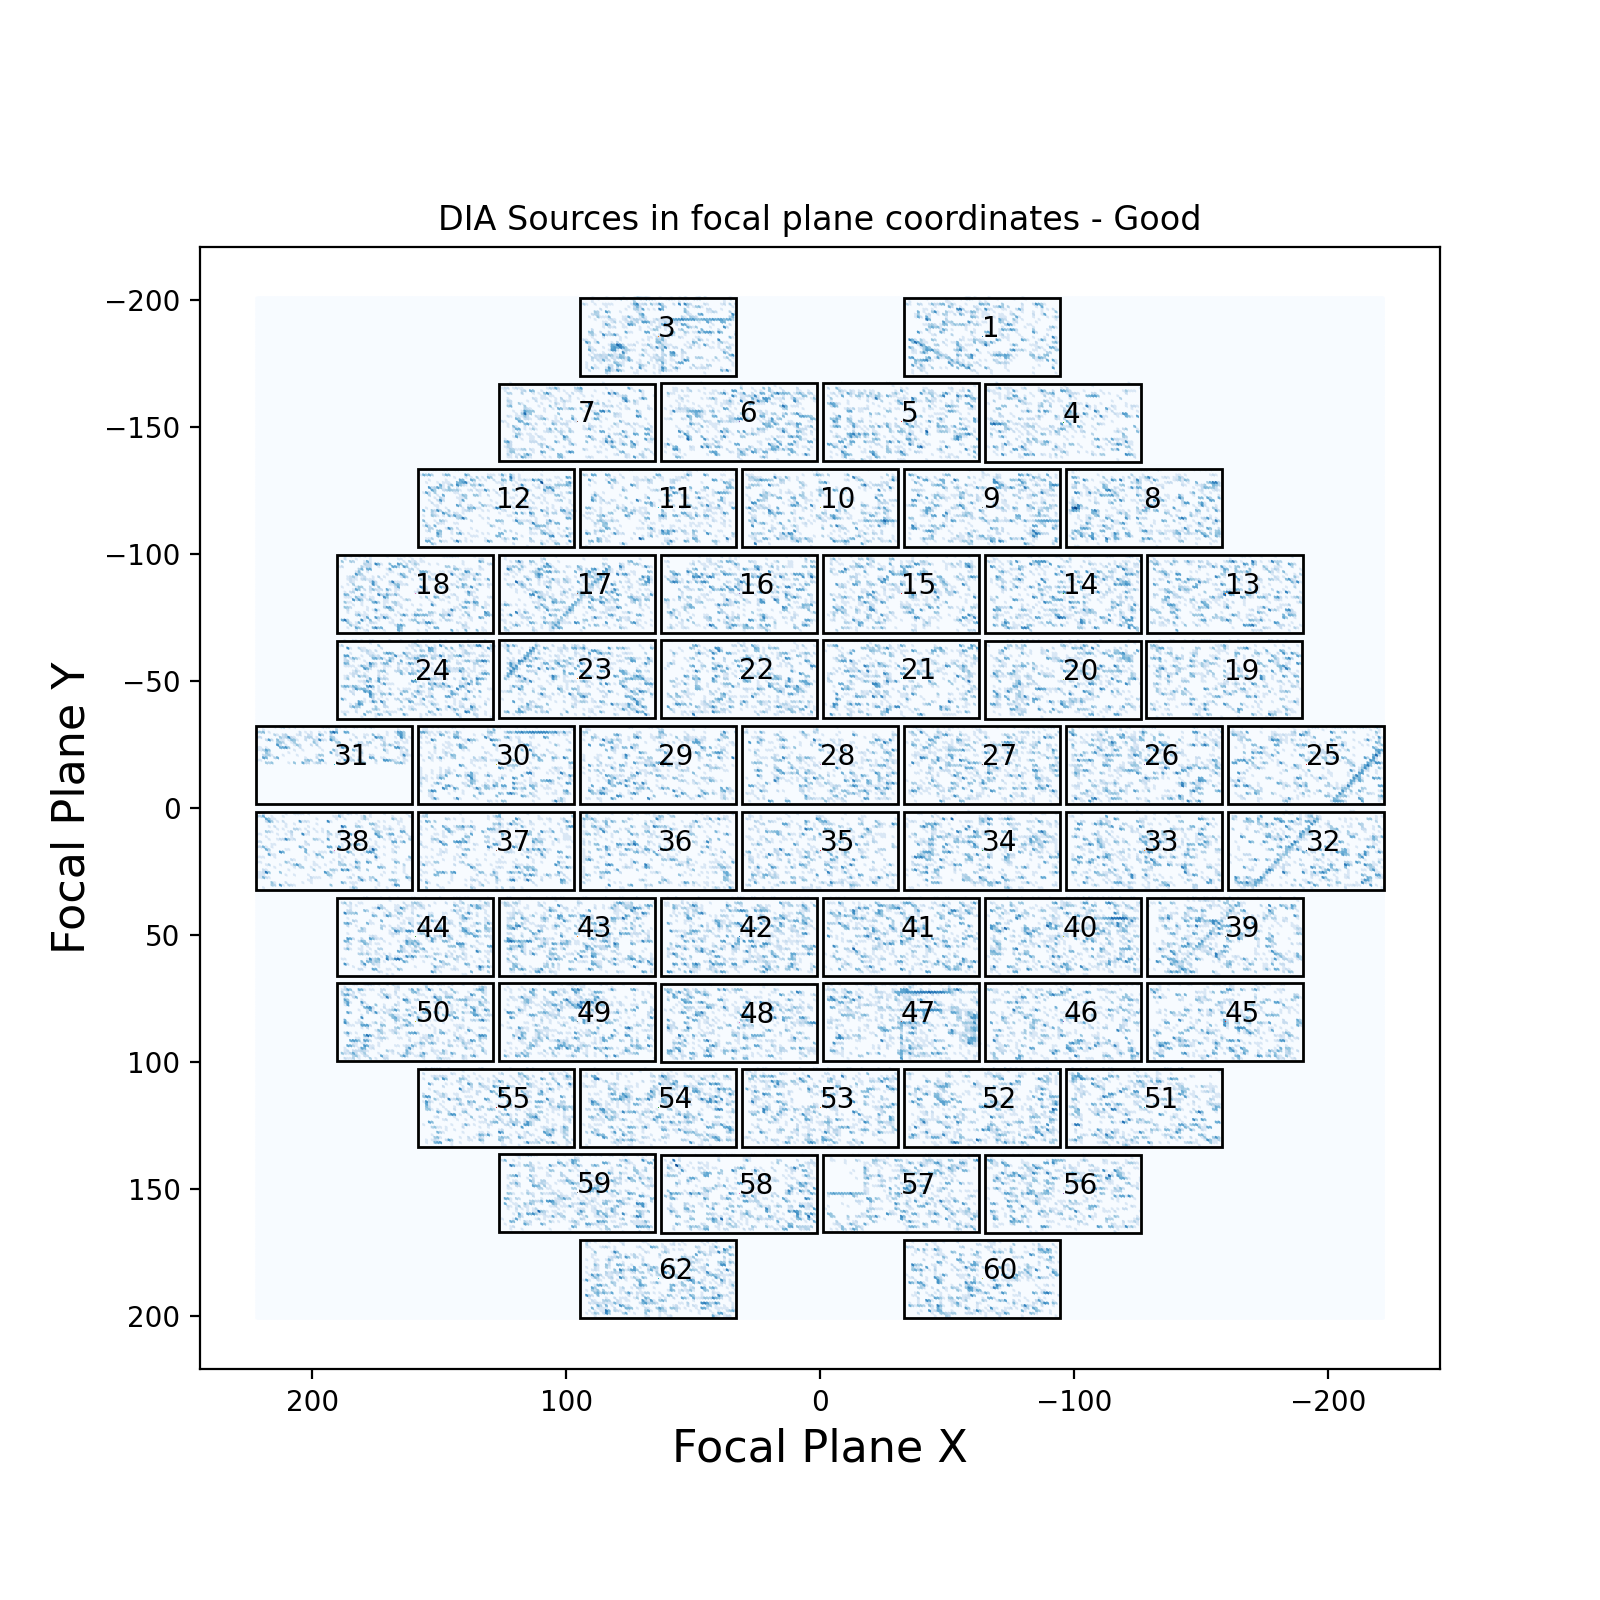

In [8]:
pla.plotDiaSourcesInFocalPlane(repo, goodSrc, title='- Good')

<IPython.core.display.Javascript object>


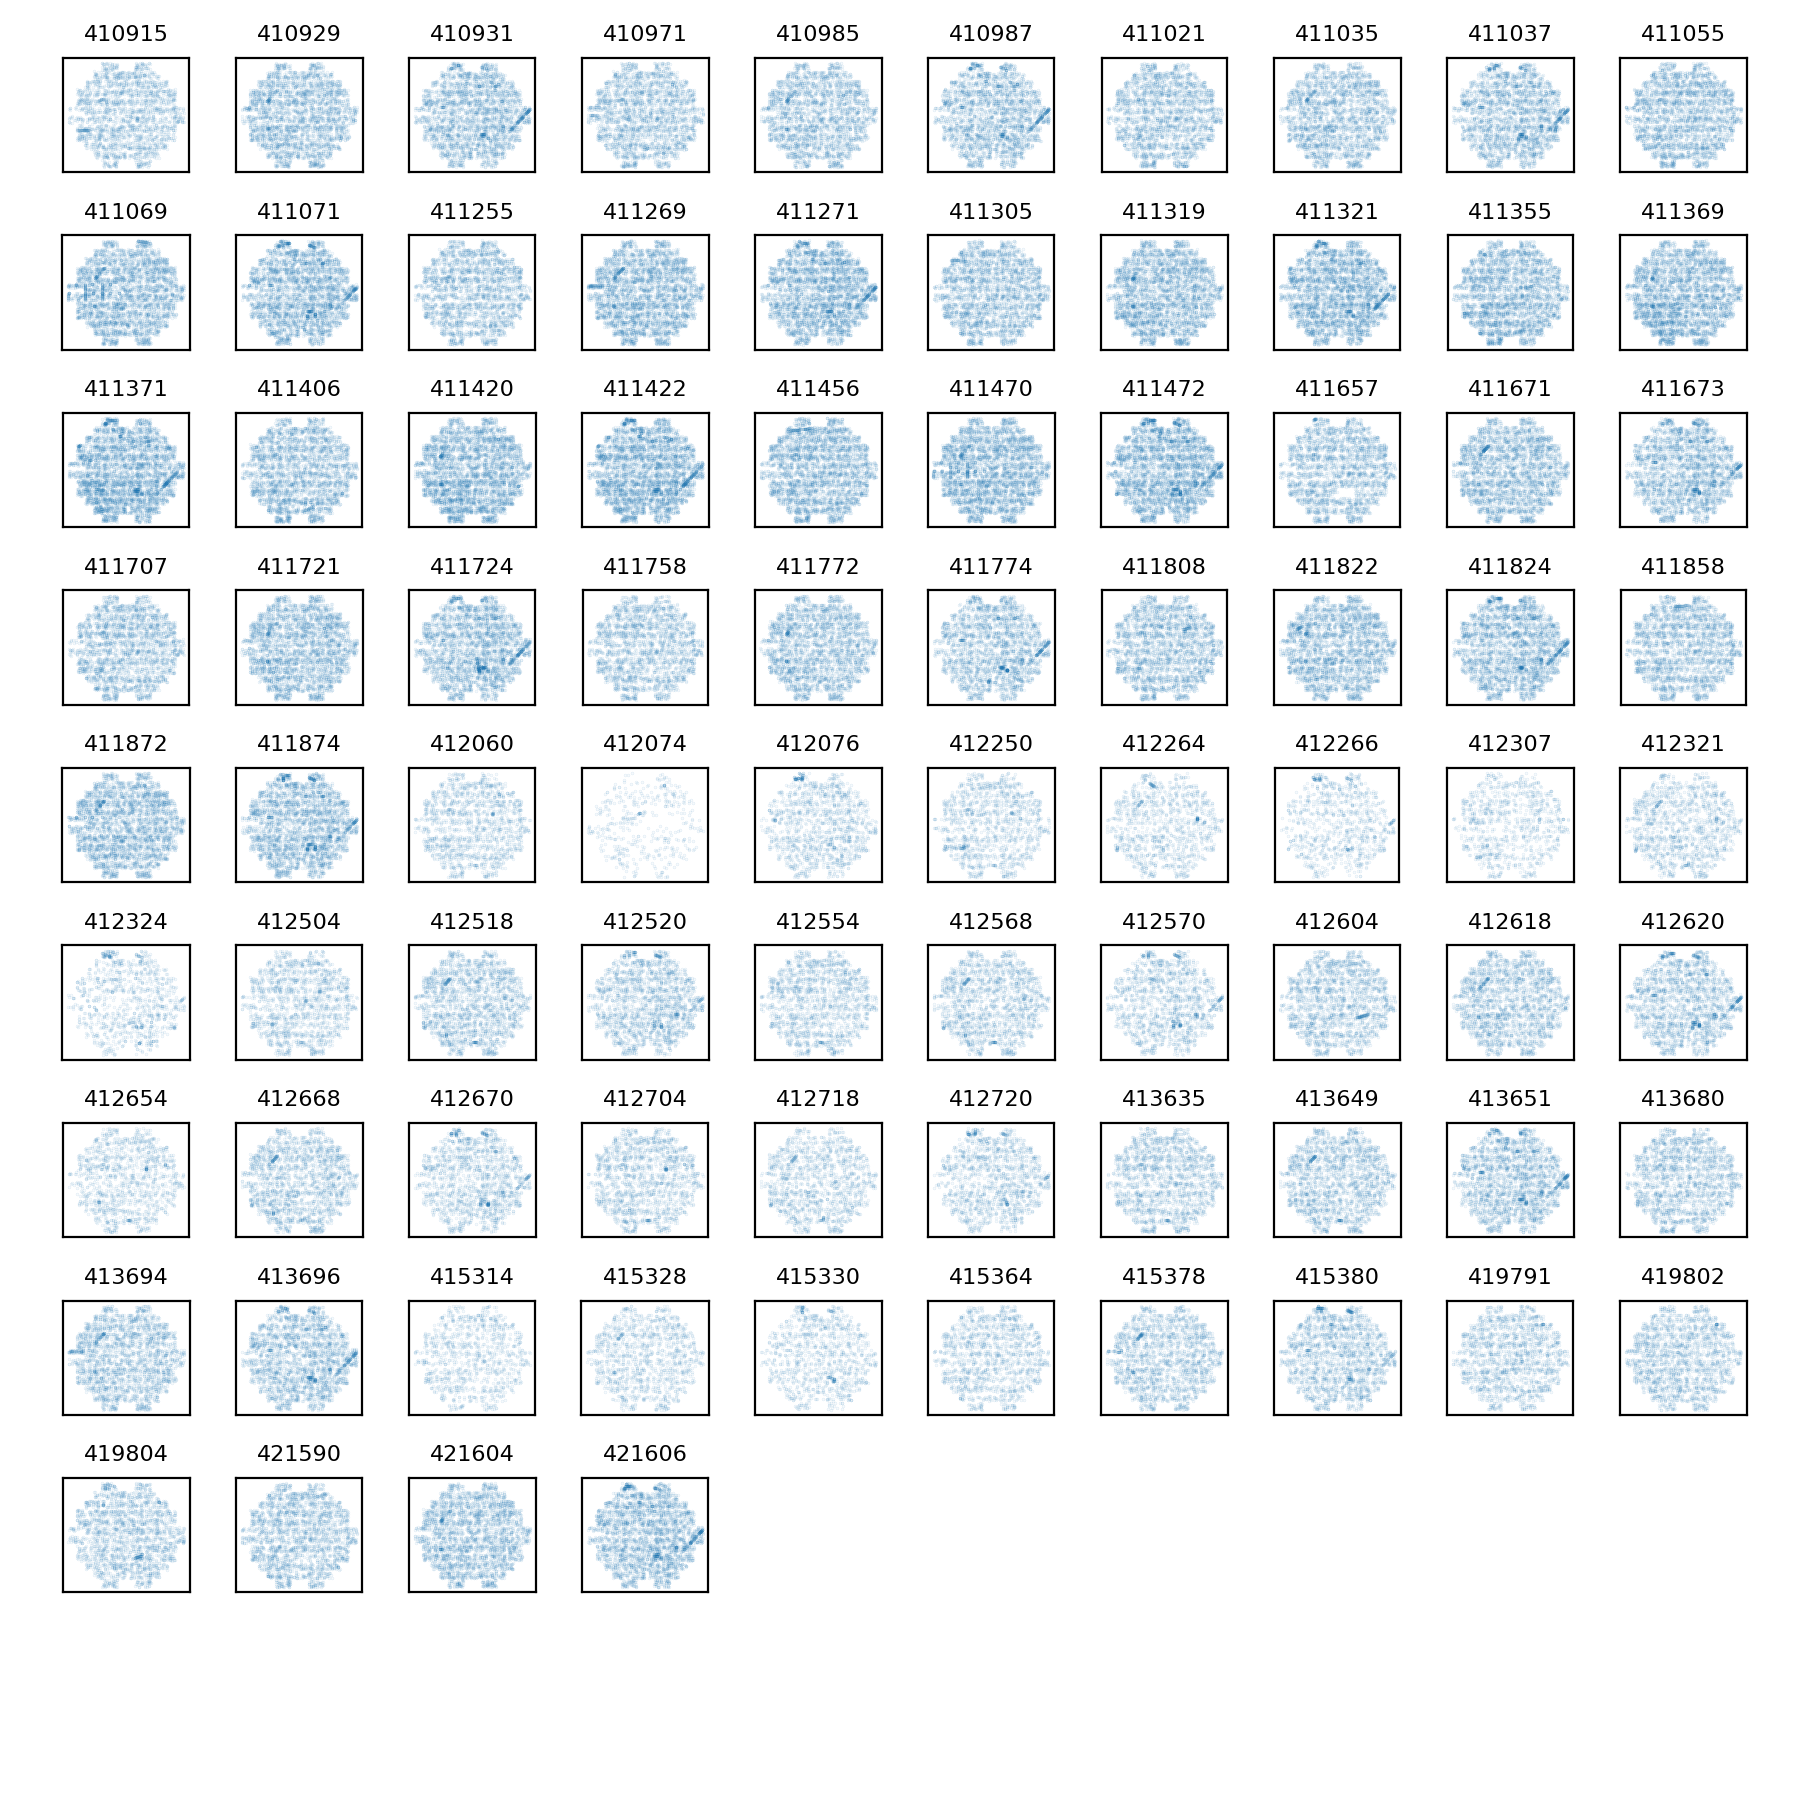

In [9]:
pla.plotDiaSourcesOnSkyGrid(repo, goodSrc)

## Compare to the previous reruns from April and June 2020

In [10]:
repo_old = '/project/mrawls/hits2015/rerun/cw_2020_06'
repo_older = '/project/mrawls/hits2015/rerun/cw_2020_04'

In [11]:
objTable_old, srcTable_old, goodObj_old, goodSrc_old = pla.loadTables(repo_old)

In [12]:
objTable_older, srcTable_older, goodObj_older, goodSrc_older = pla.loadTables(repo_older)

In [14]:
print(len(srcTable), len(srcTable_old))
print(len(goodSrc), len(goodSrc_old))
print(len(objTable), len(objTable_old))
print(len(goodObj), len(goodObj_old))

671170 671170
229290 229290
247550 247550
59352 59351


<IPython.core.display.Javascript object>


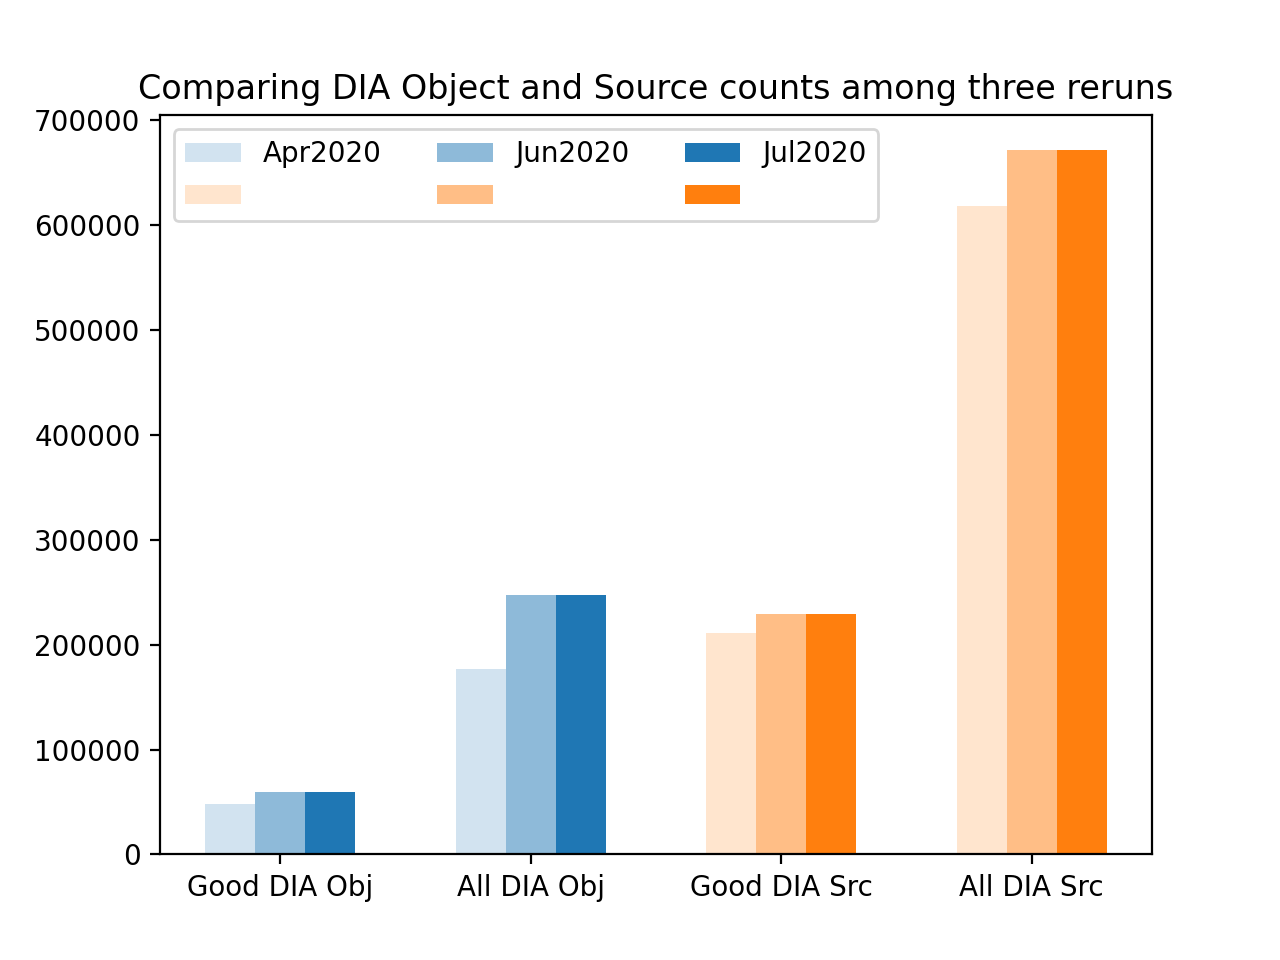

Text(0.5, 1.0, 'Comparing DIA Object and Source counts among three reruns')

In [13]:
srcTable3 = srcTable_older
goodSrc3 = goodSrc_older
objTable3 = objTable_older
goodObj3 = goodObj_older
label3 = "Apr2020"

srcTable1 = srcTable_old
goodSrc1 = goodSrc_old
objTable1 = objTable_old
goodObj1 = goodObj_old
label1 = "Jun2020"

srcTable2 = srcTable
goodSrc2 = goodSrc
objTable2 = objTable
goodObj2 = goodObj
label2 = "Jul2020"

fig, ax = plt.subplots()
barLabels = ['Good DIA Obj', 'All DIA Obj', 'Good DIA Src', 'All DIA Src']
xbar = np.array([0, 1])
width = 0.2

# April
ax.bar(xbar - width, [len(goodObj3), len(objTable3)], 
       width, label=label3, color='C0', alpha=0.2)
ax.bar(xbar + 2 - width, [len(goodSrc3), len(srcTable3)],
       width, label=' ', color='C1', alpha=0.2)

# June
ax.bar(xbar, [len(goodObj1), len(objTable1)], 
       width, label=label1, color='C0', alpha=0.5)
ax.bar(xbar + 2, [len(goodSrc1), len(srcTable1)],
       width, label=' ', color='C1', alpha=0.5)

# July
ax.bar(xbar + width, [len(goodObj2), len(objTable2)], 
       width, label=label2, color='C0')
ax.bar(xbar + 2 + width, [len(goodSrc2), len(srcTable2)],
       width, label=' ', color='C1')

plt.legend(ncol=3)
ax.set_xticks([0, 1, 2, 3])
labels = ax.set_xticklabels(barLabels)
plt.title('Comparing DIA Object and Source counts among three reruns')